# РЕГУЛЯРИЗАЦИЯ


Цель этого набора данных — облегчить разработку и тестирование регрессионных моделей для прогнозирования страховых премий на основе различных характеристик клиентов и деталей полиса.  
Страховые компании часто полагаются на основанные на данных подходы для оценки премий, принимая во внимание такие факторы, как возраст, доход, состояние здоровья и история претензий.   
Этот синтетический набор данных имитирует реальные сценарии, чтобы помочь практикующим специалистам практиковать проектирование признаков, очистку данных и обучение моделей. 

Обзор набора данных
Этот набор данных содержит 2Lk+ и 20 признаков с комбинацией категориальных, числовых и текстовых данных.  
Он включает пропущенные значения, неверные типы данных и перекошенные распределения для имитации сложностей, с которыми сталкиваются реальные наборы данных.  
Целевая переменная для прогнозирования — «Premium Amount».

Признаки (столбцы):  
Возраст - __Age__ : Возраст застрахованного лица (числовой)  
Пол - __Gender__ : Пол застрахованного лица (Категория: Мужской, Женский)  
Годовой доход - __Annual Income__ : Годовой доход застрахованного лица (числовой, асимметричный)  
Семейное положение - __Marital Status__ : Семейное положение застрахованного лица (категория: холост, женат, разведен)  
Количество иждивенцев - __Number of Dependents__ : Количество иждивенцев (числовое, с пропущенными значениями)  
Уровень образования - __Education Level__ : наивысший достигнутый уровень образования (категория: средняя школа, бакалавр, магистр, доктор философии)  
Род занятий - __Occupation__ : Род занятий застрахованного лица (категория: работающий по найму, самозанятый, безработный)  
Оценка состояния здоровья - __Health Score__ : оценка, отражающая состояние здоровья (числовая, асимметричная)  
Местоположение - __Location__ : Тип местоположения (Категория: Город, Пригород, Сельская местность)  
Тип полиса - __Policy Type__ : Тип страхового полиса (Категорийный: Базовый, Комплексный, Премиум)  
Предыдущие заявления - __Previous Claims__ : Количество предыдущих заявлений (числовое, с выбросами)  
Возраст транспортного средства - __Vehicle Age__ : Возраст застрахованного транспортного средства (числовой)  
Кредитный рейтинг - __Credit Score__ : кредитный рейтинг застрахованного лица (числовой, с отсутствующими значениями)  
Срок действия страхового полиса - __Insurance Duration__ : Срок действия страхового полиса (числовой, в годах)  
Дата начала действия полиса - __Policy Start Date__ : Дата начала действия страхового полиса (Текст, неправильно отформатирован)  
Отзывы клиентов - __Customer Feedback__ : краткие отзывы клиентов (текст)  
Статус курения  - __Smoking Status__  : Статус курения застрахованного лица (Категория: Да, Нет)  
Частота упражнений - __Exercise Frequency__ : Частота упражнений (Категория: Ежедневно, Еженедельно, Ежемесячно, Редко)  
Тип недвижимости  - __Property Type__ : Тип собственности (Категория: Дом, Квартира, Кондоминиум)  

Целевая переменная:  
Сумма страховой премии - __Premium Amount__ : целевая переменная, представляющая сумму страховой премии (числовая, асимметричная)  

In [1]:
!which python 

/home/maksim/develops/python/MAKSIM/.venv/bin/python


## Импорты

In [2]:
 
import matplotlib.pyplot as plt  
import pathlib 
import pandas as pd
import numpy as np
from glob import glob
import os 
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_log_error




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler,  MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder
 

## Текущее положение

In [3]:
# Текущее положение
print('\nТекущее положение: ')
path_1 = os.getcwd()
print(path_1)
print("\nДатасет: ")
!ls dataset


Текущее положение: 
/home/maksim/develops/python/MAKSIM/ML/regularisation

Датасет: 
sample_submission.csv  test.csv  train.csv


## Функции

In [4]:
def cleaning_resource(var_name=None):
    ''' 
        Очистка памяти для указанной переменной
    '''
    import gc
    import sys
    from pympler import asizeof
    if var_name in globals():  # Проверяем, существует ли глобальная переменная
        size1 = asizeof.asizeof(globals()[var_name])  # Измеряем реальный размер
        print(f"Объём переменной: {size1 / (1024**2):.2f} МБ")  # В мегабайтах
        del globals()[var_name]
        print(f"✅ Объект {var_name} удалён")
    elif var_name in locals():  # Проверяем локальную переменную
        size1 = asizeof.asizeof(locals()[var_name])  # Измеряем размер
        print(f"Объём переменной: {size1 / (1024**2):.2f} МБ")  # В мегабайтах
        del locals()[var_name]
        print(f"✅ Локальный объект {var_name} удалён")
    else:
        print(f"⚠️ Переменная {var_name} не найдена, но память очищена")

    gc.collect()  # Очистка памяти



def plot_histogram_box(data, col='Premium Amount'):
    ''' 
        Функция построения графиков попарно, гистограмма и Ящик с усами
    '''
    # Создаем два графика в одной строке (1 строка, 2 столбца)
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

    # Гистограмма
    sns.histplot(data[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'Гистограмма {col}')
    axes[0].set_xlabel(f'{col}')
    axes[0].set_ylabel('Частота')

    # Boxplot (ящик с усами)
    sns.boxplot(x=data[col], ax=axes[1])
    axes[1].set_title(f'Ящик с усами  {col}')
    axes[1].set_xlabel(f'{col}')

    # Показываем оба графика в одном окне
    plt.tight_layout()
    plt.show()
    
    
def plot_histogram_chart(data, col=''):
    ''' 
        Функция построения графиков попарно, гистограмма и круговой
    '''
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

    # Гистограмма (countplot)
    sns.countplot(x=data[col], ax=axes[0])
    axes[0].set_title(f'Гистограмма {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Частота')
    axes[0].tick_params(axis='x', rotation=45)  

    # Pie chart (круговая диаграмма)
    data[col].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, cmap='Set3')
    axes[1].set_title(f'Распределение категорий в {col}')
    axes[1].set_ylabel('')  
    # Выводим оба графика
    plt.tight_layout()
    plt.show()
    
    

def plot_analize_data(data1, num_col_del, cat_col_del):
    ''' 
        Строит в цикле попарно графики для числовых и категориальных столбцов
    '''
    data = data1.drop(columns=num_col_del, errors='ignore')  
    numeric_columns = data.select_dtypes(include=[np.number])  # Выбираем числовые столбцы

    for col in numeric_columns.columns:
        plot_histogram_box(data, col)
        
        
    # Выбираем категориальные столбцы (кроме 'Policy Start Date')
    data2 = data1.drop(columns=cat_col_del, errors='ignore')
    categorical_columns = data2.select_dtypes(exclude=[np.number])
    

    # Визуализация категориальных признаков
    for col in categorical_columns.columns:
        plot_histogram_chart(data2, col)
        
  

def analiz_data(data):
    ''' 
        Анализ данных
    '''
    # Выбираем только числовые столбцы
    numeric_columns = data.select_dtypes(include=[np.number])
    eda_results = pd.DataFrame({
    "Доля пропусков (%)": numeric_columns.isnull().mean() * 100,
    "Максимальное значение": numeric_columns.max(),
    "Минимальное значение": numeric_columns.min(),
    "Среднее значение": numeric_columns.mean(),
    "Медиана": numeric_columns.median(),
    "Дисперсия": numeric_columns.var(),
    "Квантиль 0.1": numeric_columns.quantile(0.1),
    "Квантиль 0.9": numeric_columns.quantile(0.9),
    "Квартиль 1 (25%)": numeric_columns.quantile(0.25),
    "Квартиль 3 (75%)": numeric_columns.quantile(0.75)
    })

    # Выбираем только категориальные столбцы
    categorical_columns = data.select_dtypes(exclude=[np.number])
    # Рассчитываем статистики
    eda_categorical = pd.DataFrame({
        "Доля пропусков (%)": categorical_columns.isnull().mean() * 100,
        "Количество уникальных значений": categorical_columns.nunique(),
        "Наиболее частое значение (мода)": categorical_columns.mode().iloc[0],
        "Частота моды (%)": categorical_columns.apply(lambda x: x.value_counts(normalize=True).iloc[0] * 100)
    })

    # Выводим результаты
    print("Числовые признаки: \n")
    print(eda_results.to_string())
    print("\nКатегориальные признаки: \n")
    print(eda_categorical.to_string())
    
    return numeric_columns, categorical_columns



    

def encode_categorical_features(data):
    """
    Кодирует категориальные признаки:
    - Label Encoding для порядковых категорий (Education Level, Exercise Frequency, Policy Type, Location, Occupation)
    - One-Hot Encoding для номинальных категорий (Gender, Marital Status, Smoking Status)
    """

    # 1. Определяем категории
    ordinal_features = ["Education Level", "Exercise Frequency", "Policy Type", "Location", "Occupation"]  # Порядковые категории
    nominal_features = ["Gender", "Marital Status", "Smoking Status"]  # Номинальные категории

    # 2. Кодируем 'Policy Type' вручную
    policy_mapping = {"Basic": 0, "Comprehensive": 1, "Premium": 2}
    if "Policy Type" in data.columns:
        data["Policy Type"] = data["Policy Type"].map(policy_mapping)
        print("Столбец 'Policy Type' закодирован как:", policy_mapping)

    # 3. Кодируем 'Location' вручную
    location_mapping = {"Rural": 0, "Suburban": 1, "Urban": 2}
    if "Location" in data.columns:
        data["Location"] = data["Location"].map(location_mapping)
        print("Столбец 'Location' закодирован как:", location_mapping)

    # 4. Кодируем 'Occupation' вручную
    occupation_mapping = {"Unemployed": 0, "Self-Employed": 1, "Employed": 2}
    if "Occupation" in data.columns:
        data["Occupation"] = data["Occupation"].map(occupation_mapping)
        print("Столбец 'Occupation' закодирован как:", occupation_mapping)

    # 5. Label Encoding для остальных порядковых переменных
    label_encoders = {}
    for col in ordinal_features:
        if col in data.columns and col not in ["Policy Type", "Location", "Occupation"]:  # Эти уже закодированы вручную
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            label_encoders[col] = le  # Сохраняем энкодер (для обратного преобразования)

    # 6. One-Hot Encoding для номинальных переменных
    data = pd.get_dummies(data, columns=nominal_features, drop_first=True)  # drop_first=True уменьшает размерность

    return data, label_encoders



def handle_missing_values(data, threshold=35):
    """
    Обрабатывает пропущенные значения:
    - Удаляет столбцы, если пропусков > threshold%
    - 'Number of Dependents' → 0
    - 'Credit Score' → среднее значение
    - 'Property Type' → 'Apartment' (самая частая категория)
    - 'Property Type' → Кодируем: Apartment=0, Condo=1, House=2
    - Остальные числовые столбцы → медиана
    - Категориальные столбцы → мода
    """

    # 1. Считаем процент пропусков в каждом столбце
    missing_percent = data.isnull().mean() * 100

    # 2. Удаляем столбцы, если пропусков > threshold%
    cols_to_drop = missing_percent[missing_percent > threshold].index
    data = data.drop(columns=cols_to_drop)
    print(f"Удалены столбцы с более чем {threshold}% пропусков: {list(cols_to_drop)}\n")

    # 3. Заполняем пропуски в "Number of Dependents" значением 0
    if "Number of Dependents" in data.columns:
        data["Number of Dependents"].fillna(0, inplace=True)
        print("Пропуски в 'Number of Dependents' заменены на 0.\n")

    # 4. Заполняем пропуски в "Credit Score" средним значением
    if "Credit Score" in data.columns:
        mean_credit_score = data["Credit Score"].mean()
        data["Credit Score"].fillna(mean_credit_score, inplace=True)
        print(f"Пропуски в 'Credit Score' заменены на среднее: {mean_credit_score:.2f}\n")

    # 5. Заполняем пропуски в "Property Type")
    if "Property Type" in data.columns:
        data["Property Type"].fillna("House", inplace=True)
        print("Пропуски в 'Property Type' заменены на 'House'.\n")

        # Кодируем 'Property Type' в порядке возрастания
        property_mapping = {"Apartment": 0, "Condo": 1, "House": 2}
        data["Property Type"] = data["Property Type"].map(property_mapping)
        print("Столбец 'Property Type' закодирован: Apartment=0, Condo=1, House=2.\n")

    # 6. Заполняем оставшиеся числовые столбцы медианой
    numeric_columns = data.select_dtypes(include=[np.number]).drop(columns=["Number of Dependents", "Credit Score"], errors="ignore")
    data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

    # 7. Заполняем остальные категориальные столбцы модой
    categorical_columns = data.select_dtypes(exclude=[np.number])
    for col in categorical_columns.columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

    return data
   
    
def normalize_data(data, method="standard"):
    """
    Нормализует числовые данные.
    method="standard" → StandardScaler (приводит к среднему 0 и std=1)
    method="minmax" → MinMaxScaler (масштабирует от 0 до 1)
    """

    numeric_columns = data.select_dtypes(include=[np.number]).columns  # Только числовые столбцы
    scaler = StandardScaler() if method == "standard" else MinMaxScaler()

    # Применяем масштабирование только к числовым столбцам
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

    return data
    
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = mse ** 0.5
    rmsle_poly = root_mean_squared_log_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "RMSLE": rmsle_poly, "R²": r2}

## 1) Загрузка данных

In [5]:
cleaning_resource()

⚠️ Переменная None не найдена, но память очищена


In [6]:
# Загрузка данных
train_path = "dataset/train.csv"
test_path = "dataset/test.csv"

train_data = pd.read_csv(train_path)
# test_data = pd.read_csv(test_path)

print('\nРазмер данных: ', train_data.shape)
# Просмотр первых строк
print(train_data.head().to_string(index=False))

train_data.isnull().sum()


Размер данных:  (1200000, 21)
 id  Age Gender  Annual Income Marital Status  Number of Dependents Education Level    Occupation  Health Score Location   Policy Type  Previous Claims  Vehicle Age  Credit Score  Insurance Duration          Policy Start Date Customer Feedback Smoking Status Exercise Frequency Property Type  Premium Amount
  0 19.0 Female        10049.0        Married                   1.0      Bachelor's Self-Employed     22.598761    Urban       Premium              2.0         17.0         372.0                 5.0 2023-12-23 15:21:39.134960              Poor             No             Weekly         House          2869.0
  1 39.0 Female        31678.0       Divorced                   3.0        Master's           NaN     15.569731    Rural Comprehensive              1.0         12.0         694.0                 2.0 2023-06-12 15:21:39.111551           Average            Yes            Monthly         House          1483.0
  2 23.0   Male        25602.0       Divorced

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

## 2) Анализ данных

In [7]:
# Оставляем только числовые столбцы
numeric_data = train_data.select_dtypes(include=[np.number])

# Вычисляем статистики
statistics = {
    "Доля пропусков": train_data.isnull().mean(),
    "Максимум": numeric_data.max(),
    "Минимум": numeric_data.min(),
    "Среднее": numeric_data.mean(),
    "Медиана": numeric_data.median(),
    "Дисперсия": numeric_data.var(),
    "Квантиль 0.1": numeric_data.quantile(0.1),
    "Квантиль 0.9": numeric_data.quantile(0.9),
    "Квартиль 1": numeric_data.quantile(0.25),
    "Квартиль 3": numeric_data.quantile(0.75),
}

statistics_df = pd.DataFrame(statistics)
print(statistics_df.to_string())

                      Доля пропусков      Максимум     Минимум        Среднее        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9     Квартиль 1     Квартиль 3
Age                     1.558750e-02  6.400000e+01   18.000000      41.145563      41.000000  1.833302e+02      22.000000  6.000000e+01      30.000000      53.000000
Annual Income           3.745750e-02  1.499970e+05    1.000000   32745.217777   23911.000000  1.035521e+09    2627.000000  8.107500e+04    8001.000000   44634.000000
Credit Score            1.149017e-01  8.490000e+02  300.000000     592.924350     595.000000  2.249458e+04     383.000000  7.920000e+02     468.000000     721.000000
Customer Feedback       6.485333e-02           NaN         NaN            NaN            NaN           NaN            NaN           NaN            NaN            NaN
Education Level         0.000000e+00           NaN         NaN            NaN            NaN           NaN            NaN           NaN            NaN            NaN
Exer

### Категориальные переменные

In [8]:
categorical_columns = train_data.select_dtypes(exclude=[np.number])
print("Категориальные столбцы:")
print(categorical_columns.nunique()) 

Категориальные столбцы:
Gender                     2
Marital Status             3
Education Level            4
Occupation                 3
Location                   3
Policy Type                3
Policy Start Date     167381
Customer Feedback          3
Smoking Status             2
Exercise Frequency         4
Property Type              3
dtype: int64


In [9]:
categorical_columns

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,2023-12-23 15:21:39.134960,Poor,No,Weekly,House
1,Female,Divorced,Master's,NaN,Rural,Comprehensive,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House
2,Male,Divorced,High School,Self-Employed,Suburban,Premium,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House
3,Male,Married,Bachelor's,NaN,Rural,Basic,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment
4,Male,Single,Bachelor's,Self-Employed,Rural,Premium,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...
1199995,Female,Married,Master's,Unemployed,Urban,Premium,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment
1199996,Male,Divorced,Master's,Self-Employed,Rural,Comprehensive,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment
1199997,Male,Divorced,Master's,NaN,Suburban,Basic,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo
1199998,Male,Single,PhD,NaN,Suburban,Premium,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment


### Числовые переменные

In [10]:
numeric_columns = train_data.select_dtypes(include=[np.number])
print("Числовые столбцы:")
print(numeric_columns.nunique()) 

Числовые столбцы:
id                      1200000
Age                          47
Annual Income             88593
Number of Dependents          5
Health Score             532657
Previous Claims              10
Vehicle Age                  20
Credit Score                550
Insurance Duration            9
Premium Amount             4794
dtype: int64


In [11]:
numeric_columns

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
0,0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2869.0
1,1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,1483.0
2,2,23.0,25602.0,3.0,47.177549,1.0,14.0,NaN,3.0,567.0
3,3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,765.0
4,4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2022.0
...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,27316.0,0.0,13.772907,NaN,5.0,372.0,3.0,1303.0
1199996,1199996,54.0,35786.0,NaN,11.483482,NaN,10.0,597.0,4.0,821.0
1199997,1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,NaN,6.0,371.0
1199998,1199998,55.0,NaN,1.0,18.547381,1.0,7.0,407.0,4.0,596.0


In [12]:
print(numeric_columns.describe().to_string())


                 id           Age  Annual Income  Number of Dependents  Health Score  Previous Claims   Vehicle Age  Credit Score  Insurance Duration  Premium Amount
count  1.200000e+06  1.181295e+06   1.155051e+06          1.090328e+06  1.125924e+06    835971.000000  1.199994e+06  1.062118e+06        1.199999e+06    1.200000e+06
mean   5.999995e+05  4.114556e+01   3.274522e+04          2.009934e+00  2.561391e+01         1.002689  9.569889e+00  5.929244e+02        5.018219e+00    1.102545e+03
std    3.464103e+05  1.353995e+01   3.217951e+04          1.417338e+00  1.220346e+01         0.982840  5.776189e+00  1.499819e+02        2.594331e+00    8.649989e+02
min    0.000000e+00  1.800000e+01   1.000000e+00          0.000000e+00  2.012237e+00         0.000000  0.000000e+00  3.000000e+02        1.000000e+00    2.000000e+01
25%    2.999998e+05  3.000000e+01   8.001000e+03          1.000000e+00  1.591896e+01         0.000000  5.000000e+00  4.680000e+02        3.000000e+00    5.140000e+02
50% 

In [13]:
   
numeric_columns, categorical_columns = analiz_data(train_data)

Числовые признаки: 

                      Доля пропусков (%)  Максимальное значение  Минимальное значение  Среднее значение        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9  Квартиль 1 (25%)  Квартиль 3 (75%)
id                              0.000000           1.199999e+06              0.000000     599999.500000  599999.500000  1.200001e+11  119999.900000  1.079999e+06     299999.750000     899999.250000
Age                             1.558750           6.400000e+01             18.000000         41.145563      41.000000  1.833302e+02      22.000000  6.000000e+01         30.000000         53.000000
Annual Income                   3.745750           1.499970e+05              1.000000      32745.217777   23911.000000  1.035521e+09    2627.000000  8.107500e+04       8001.000000      44634.000000
Number of Dependents            9.139333           4.000000e+00              0.000000          2.009934       2.000000  2.008846e+00       0.000000  4.000000e+00          1.000000        

In [14]:
# Восстанавливаем DataFrame после анализа
train_data_processed = pd.concat([numeric_columns, categorical_columns], axis=1)

# Проверяем размерность
print(train_data_processed.shape)
print(train_data_processed.head().to_string())


(1200000, 21)
   id   Age  Annual Income  Number of Dependents  Health Score  Previous Claims  Vehicle Age  Credit Score  Insurance Duration  Premium Amount  Gender Marital Status Education Level     Occupation  Location    Policy Type           Policy Start Date Customer Feedback Smoking Status Exercise Frequency Property Type
0   0  19.0        10049.0                   1.0     22.598761              2.0         17.0         372.0                 5.0          2869.0  Female        Married      Bachelor's  Self-Employed     Urban        Premium  2023-12-23 15:21:39.134960              Poor             No             Weekly         House
1   1  39.0        31678.0                   3.0     15.569731              1.0         12.0         694.0                 2.0          1483.0  Female       Divorced        Master's            NaN     Rural  Comprehensive  2023-06-12 15:21:39.111551           Average            Yes            Monthly         House
2   2  23.0        25602.0            

In [15]:
# Очистка от пропусков 
train_data_cleaned = handle_missing_values(train_data_processed)


Удалены столбцы с более чем 35% пропусков: []

Пропуски в 'Number of Dependents' заменены на 0.

Пропуски в 'Credit Score' заменены на среднее: 592.92

Пропуски в 'Property Type' заменены на 'House'.

Столбец 'Property Type' закодирован: Apartment=0, Condo=1, House=2.



/tmp/ipykernel_30757/3959202393.py:200: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Number of Dependents"].fillna(0, inplace=True)
/tmp/ipykernel_30757/3959202393.py:206: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

### Проверка с исправленными данными

In [16]:
numeric_columns, categorical_columns = analiz_data(train_data_cleaned)

Числовые признаки: 

                      Доля пропусков (%)  Максимальное значение  Минимальное значение  Среднее значение        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9  Квартиль 1 (25%)  Квартиль 3 (75%)
id                                   0.0           1.199999e+06              0.000000     599999.500000  599999.500000  1.200001e+11  119999.900000  1.079999e+06     299999.750000      899999.25000
Age                                  0.0           6.400000e+01             18.000000         41.143294      41.000000  1.804729e+02      22.000000  6.000000e+01         30.000000          53.00000
Annual Income                        0.0           1.499970e+05              1.000000      32414.310064   23911.000000  9.995464e+08    2699.000000  7.944810e+04       8646.000000       43936.00000
Number of Dependents                 0.0           4.000000e+00              0.000000          1.826239       2.000000  2.160721e+00       0.000000  4.000000e+00          0.000000        

In [17]:

train_data_encoded, label_encoders = encode_categorical_features(train_data_cleaned)


print(train_data_encoded.head().to_string())


Столбец 'Policy Type' закодирован как: {'Basic': 0, 'Comprehensive': 1, 'Premium': 2}
Столбец 'Location' закодирован как: {'Rural': 0, 'Suburban': 1, 'Urban': 2}
Столбец 'Occupation' закодирован как: {'Unemployed': 0, 'Self-Employed': 1, 'Employed': 2}
   id   Age  Annual Income  Number of Dependents  Health Score  Previous Claims  Vehicle Age  Credit Score  Insurance Duration  Premium Amount  Education Level  Occupation  Location  Policy Type           Policy Start Date Customer Feedback  Exercise Frequency  Property Type  Gender_Male  Marital Status_Married  Marital Status_Single  Smoking Status_Yes
0   0  19.0        10049.0                   1.0     22.598761              2.0         17.0     372.00000                 5.0          2869.0                0           1         2            2  2023-12-23 15:21:39.134960              Poor                   3              2        False                    True                  False               False
1   1  39.0        31678.0         

#### Не обработан  столбец:   __Policy Start Date__

In [18]:
print(train_data_encoded["Policy Start Date"])


0          2023-12-23 15:21:39.134960
1          2023-06-12 15:21:39.111551
2          2023-09-30 15:21:39.221386
3          2024-06-12 15:21:39.226954
4          2021-12-01 15:21:39.252145
                      ...            
1199995    2023-05-03 15:21:39.257696
1199996    2022-09-10 15:21:39.134960
1199997    2021-05-25 15:21:39.106582
1199998    2021-09-19 15:21:39.190215
1199999    2020-08-26 15:21:39.155231
Name: Policy Start Date, Length: 1200000, dtype: object


#### Тип столбца: __object__

#### Преобразуем столбец

In [19]:

train_data_encoded["Policy Start Date"] = pd.to_datetime(train_data_encoded["Policy Start Date"])

# Извлекаем только год
train_data_encoded["Policy Start Date"] = train_data_encoded["Policy Start Date"].dt.year  

# Сортируем список уникальных годов
unique_years = sorted(train_data_encoded["Policy Start Date"].unique())

# Создаём словарь для кодирования годов
year_mapping = {year: idx for idx, year in enumerate(unique_years)}

# Применяем замену
train_data_encoded["Policy Start Date"] = train_data_encoded["Policy Start Date"].map(year_mapping)

# Проверяем результат
print(train_data_encoded[["Policy Start Date"]].head())
print(f"Годы закодированы следующим образом: {year_mapping}")


   Policy Start Date
0                  4
1                  4
2                  4
3                  5
4                  2
Годы закодированы следующим образом: {np.int32(2019): 0, np.int32(2020): 1, np.int32(2021): 2, np.int32(2022): 3, np.int32(2023): 4, np.int32(2024): 5}


#### Проверим ещё раз данные

In [20]:
numeric_columns, categorical_columns = analiz_data(train_data_encoded)

Числовые признаки: 

                      Доля пропусков (%)  Максимальное значение  Минимальное значение  Среднее значение        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9  Квартиль 1 (25%)  Квартиль 3 (75%)
id                                   0.0           1.199999e+06              0.000000     599999.500000  599999.500000  1.200001e+11  119999.900000  1.079999e+06     299999.750000      899999.25000
Age                                  0.0           6.400000e+01             18.000000         41.143294      41.000000  1.804729e+02      22.000000  6.000000e+01         30.000000          53.00000
Annual Income                        0.0           1.499970e+05              1.000000      32414.310064   23911.000000  9.995464e+08    2699.000000  7.944810e+04       8646.000000       43936.00000
Number of Dependents                 0.0           4.000000e+00              0.000000          1.826239       2.000000  2.160721e+00       0.000000  4.000000e+00          0.000000        

#### Ещё не обработан столбец: __Customer Feedback__

#### Просмотр столбца

In [21]:
train_data_encoded["Customer Feedback"]

0             Poor
1          Average
2             Good
3             Poor
4             Poor
            ...   
1199995       Poor
1199996       Poor
1199997       Good
1199998       Poor
1199999       Good
Name: Customer Feedback, Length: 1200000, dtype: object

#### Преобразуем столбец

In [22]:
# Определяем правильный порядок для категорий
feedback_mapping = {
    "Average": 1,
    "Good": 2,
    "Poor": 0
}

# Применяем mapping
train_data_encoded["Customer Feedback"] = train_data_encoded["Customer Feedback"].map(feedback_mapping)

# Проверяем результат
print(train_data_encoded["Customer Feedback"].head())


0    0
1    1
2    2
3    0
4    0
Name: Customer Feedback, dtype: int64


In [23]:
numeric_columns, categorical_columns = analiz_data(train_data_encoded)

Числовые признаки: 

                      Доля пропусков (%)  Максимальное значение  Минимальное значение  Среднее значение        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9  Квартиль 1 (25%)  Квартиль 3 (75%)
id                                   0.0           1.199999e+06              0.000000     599999.500000  599999.500000  1.200001e+11  119999.900000  1.079999e+06     299999.750000      899999.25000
Age                                  0.0           6.400000e+01             18.000000         41.143294      41.000000  1.804729e+02      22.000000  6.000000e+01         30.000000          53.00000
Annual Income                        0.0           1.499970e+05              1.000000      32414.310064   23911.000000  9.995464e+08    2699.000000  7.944810e+04       8646.000000       43936.00000
Number of Dependents                 0.0           4.000000e+00              0.000000          1.826239       2.000000  2.160721e+00       0.000000  4.000000e+00          0.000000        

## 3) Подготовка датасета к построению моделей ML

#### Просмотр  целевой переменной

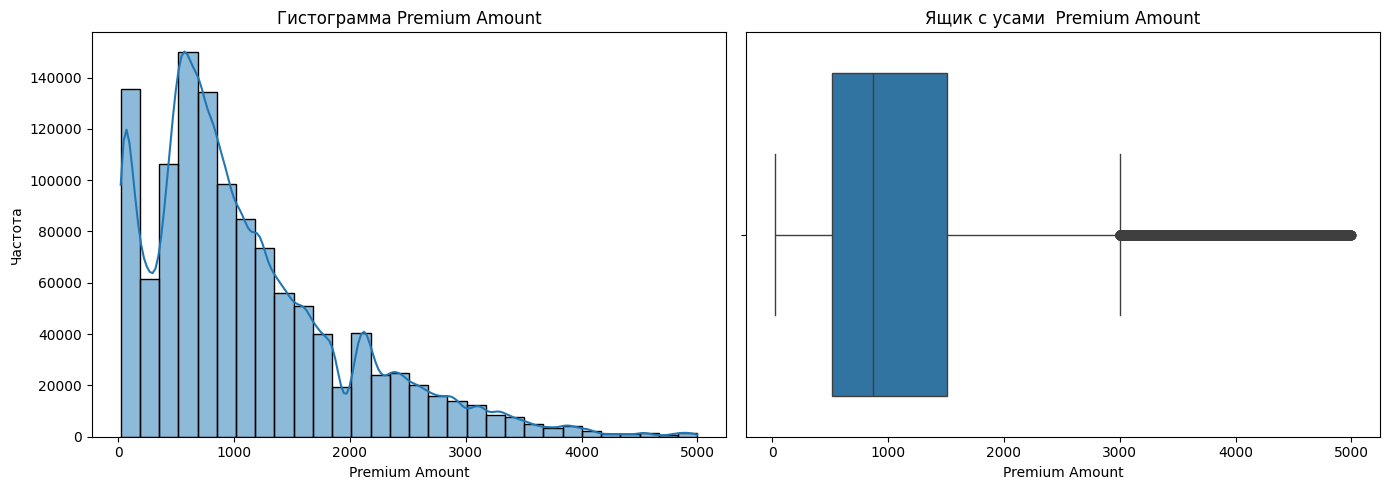

In [24]:
plot_histogram_box(train_data_encoded)

In [25]:
# Находим выбросы в Premium Amount с помощью IQR
Q1 = train_data_encoded["Premium Amount"].quantile(0.35)
Q3 = train_data_encoded["Premium Amount"].quantile(0.65)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаляем выбросы
train_data_new = train_data_encoded[(train_data_encoded["Premium Amount"] >= lower_bound) & 
                                        (train_data_encoded["Premium Amount"] <= upper_bound)]

# Проверяем размер после удаления выбросов
print(f"Количество строк после удаления выбросов: {train_data_new.shape[0]}")


Количество строк после удаления выбросов: 1015992


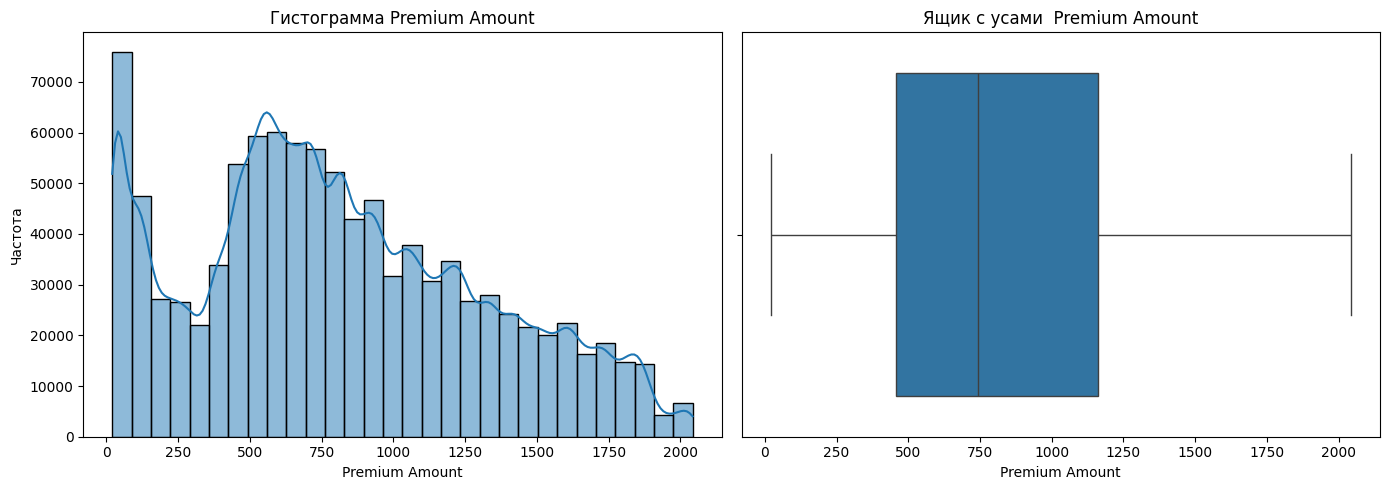

In [26]:
plot_histogram_box(train_data_new)

In [27]:
numeric_columns, categorical_columns = analiz_data(train_data_new)

Числовые признаки: 

                      Доля пропусков (%)  Максимальное значение  Минимальное значение  Среднее значение        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9  Квартиль 1 (25%)  Квартиль 3 (75%)
id                                   0.0           1.199998e+06              1.000000     600057.451647  600189.500000  1.200085e+11  119984.100000  1.079990e+06     299905.750000     900085.500000
Age                                  0.0           6.400000e+01             18.000000         41.153658      41.000000  1.804694e+02      22.000000  6.000000e+01         30.000000         53.000000
Annual Income                        0.0           1.499970e+05              2.000000      31645.797875   23911.000000  9.396569e+08    2817.000000  7.553800e+04       9053.000000      43462.000000
Number of Dependents                 0.0           4.000000e+00              0.000000          1.828538       2.000000  2.161179e+00       0.000000  4.000000e+00          0.000000        

In [28]:
train_data_new.shape

(1015992, 22)

In [29]:
# Проверим выбросы в других числовых столбцах с использованием IQR
for col in numeric_columns.columns:
    Q1 = train_data_new[col].quantile(0.25)
    Q3 = train_data_new[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Удаляем выбросы
    train_data_new_2 = train_data_new[(train_data_new[col] >= lower_bound) & 
                                             (train_data_new[col] <= upper_bound)]
    
    print(f"Обработаны выбросы в столбце {col}.")


Обработаны выбросы в столбце id.
Обработаны выбросы в столбце Age.
Обработаны выбросы в столбце Annual Income.
Обработаны выбросы в столбце Number of Dependents.
Обработаны выбросы в столбце Health Score.
Обработаны выбросы в столбце Previous Claims.
Обработаны выбросы в столбце Vehicle Age.
Обработаны выбросы в столбце Credit Score.
Обработаны выбросы в столбце Insurance Duration.
Обработаны выбросы в столбце Premium Amount.
Обработаны выбросы в столбце Education Level.
Обработаны выбросы в столбце Occupation.
Обработаны выбросы в столбце Location.
Обработаны выбросы в столбце Policy Type.
Обработаны выбросы в столбце Policy Start Date.
Обработаны выбросы в столбце Customer Feedback.
Обработаны выбросы в столбце Exercise Frequency.
Обработаны выбросы в столбце Property Type.


In [30]:
numeric_columns, categorical_columns = analiz_data(train_data_new_2)

Числовые признаки: 

                      Доля пропусков (%)  Максимальное значение  Минимальное значение  Среднее значение        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9  Квартиль 1 (25%)  Квартиль 3 (75%)
id                                   0.0           1.199998e+06              1.000000     600057.451647  600189.500000  1.200085e+11  119984.100000  1.079990e+06     299905.750000     900085.500000
Age                                  0.0           6.400000e+01             18.000000         41.153658      41.000000  1.804694e+02      22.000000  6.000000e+01         30.000000         53.000000
Annual Income                        0.0           1.499970e+05              2.000000      31645.797875   23911.000000  9.396569e+08    2817.000000  7.553800e+04       9053.000000      43462.000000
Number of Dependents                 0.0           4.000000e+00              0.000000          1.828538       2.000000  2.161179e+00       0.000000  4.000000e+00          0.000000        

In [31]:
train_data_new_2.shape

(1015992, 22)

In [32]:
num_col_del = ['id']
cat_col_del = ['']

# plot_analize_data(train_data_new_2, num_col_del, cat_col_del)


#### Не все данные сбалансированы

#### используем Cube Root Transform

In [33]:
train_data_new_2["Premium Amount"] = np.cbrt(train_data_new_2["Premium Amount"])
train_data_new_2["Annual Income"] = np.cbrt(train_data_new_2["Annual Income"])

In [34]:

print(train_data_new_2.head().to_string(index=False))

 id  Age  Annual Income  Number of Dependents  Health Score  Previous Claims  Vehicle Age  Credit Score  Insurance Duration  Premium Amount  Education Level  Occupation  Location  Policy Type  Policy Start Date  Customer Feedback  Exercise Frequency  Property Type  Gender_Male  Marital Status_Married  Marital Status_Single  Smoking Status_Yes
  1 39.0      31.641174                   3.0     15.569731              1.0         12.0     694.00000                 2.0       11.403733                2           2         0            1                  4                  1                   1              2        False                   False                  False                True
  2 23.0      29.473019                   3.0     47.177549              1.0         14.0     592.92435                 3.0        8.276773                1           1         1            2                  4                  2                   3              2         True                   False         

### Корреляция

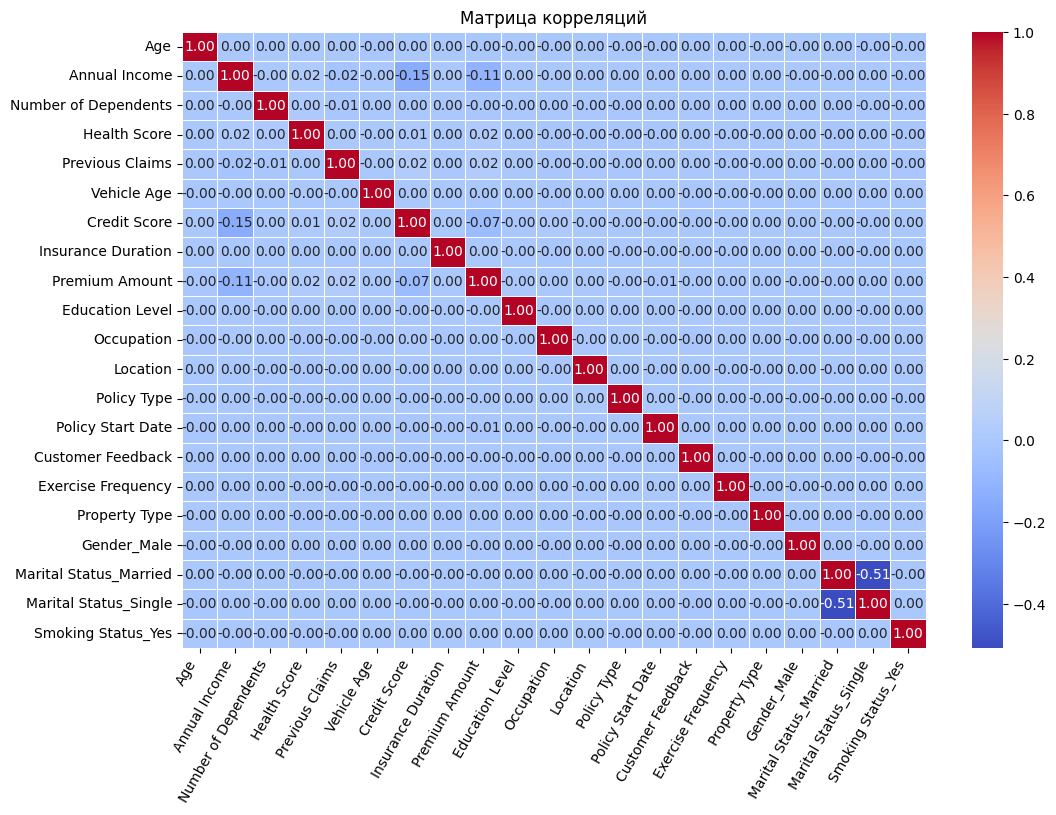

In [35]:

train_data_new_2 = train_data_new_2.drop(columns=["id"]) 

# Вычисляем корреляцию Пирсона между всеми числовыми переменными
corr_matrix = train_data_new_2.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Матрица корреляций")
plt.xticks(rotation=60, ha='right')  
plt.yticks(rotation=0) 
plt.show()


In [36]:
# Выбираем корреляцию с целевой переменной
target_corr = corr_matrix["Premium Amount"].sort_values(ascending=True)

# Выводим признаки, которые наиболее связаны с Premium Amount
print(target_corr)


Annual Income            -0.112934
Credit Score             -0.069991
Policy Start Date        -0.006020
Number of Dependents     -0.002134
Age                      -0.001644
Policy Type              -0.000690
Customer Feedback        -0.000550
Gender_Male              -0.000464
Marital Status_Married   -0.000162
Education Level          -0.000140
Exercise Frequency        0.000188
Occupation                0.000996
Vehicle Age               0.001202
Insurance Duration        0.001311
Smoking Status_Yes        0.001546
Property Type             0.002176
Location                  0.002266
Marital Status_Single     0.003344
Health Score              0.016862
Previous Claims           0.022727
Premium Amount            1.000000
Name: Premium Amount, dtype: float64


#### Разделение данных

In [37]:
# Удаляем целевую переменную из набора признаков
X = train_data_new_2.drop(columns=["Premium Amount"]) 
y = train_data_new_2["Premium Amount"]  


In [38]:
from sklearn.model_selection import train_test_split

# Разделяем данные
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_val.shape}")


Размер обучающей выборки: (812793, 20)
Размер тестовой выборки: (203199, 20)


## 4) Обучение

In [39]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet


#### Все признаки, не полином, без подбора параметров

In [40]:
 # По умолчанию со всеми столбцами (признаками) НЕ ПОЛИНОМ

# Удаляем целевую переменную из набора признаков
X3 = train_data_new_2.drop(columns=["Premium Amount"]) 
y3= train_data_new_2["Premium Amount"]  

from sklearn.model_selection import train_test_split

# Разделяем данные
X_train, X_val, y_train, y_val = train_test_split(X3, y3, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_val.shape}")

 
# Функция оценки
def evaluate_model3(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    rmsle_poly = root_mean_squared_log_error(y_val, y_pred)
    print(f"\n {model}:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, RMSLE: {rmsle_poly:.4f}, R²: {r2:.4f}")
    
#####################################
  
# Обучаем модели
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)  
elastic.fit(X_train, y_train)

# Оцениваем модели
ridge_results = evaluate_model3(ridge, X_val, y_val)
lasso_results = evaluate_model3(lasso, X_val, y_val)
elastic_results = evaluate_model3(elastic, X_val, y_val)


Размер обучающей выборки: (812793, 20)
Размер тестовой выборки: (203199, 20)

 Ridge():
MAE: 1.8444, MSE: 5.6095, RMSE: 2.3684, RMSLE: 0.2964, R²: 0.0220

 Lasso(alpha=0.1):
MAE: 1.8452, MSE: 5.6128, RMSE: 2.3691, RMSLE: 0.2965, R²: 0.0214

 ElasticNet(alpha=0.1):
MAE: 1.8450, MSE: 5.6127, RMSE: 2.3691, RMSLE: 0.2965, R²: 0.0215


In [41]:
# С подбором параметров со всеми столбцами  НЕ ПОЛИНОМ

# Определяем диапазон значений α
alphas = np.logspace(-4, 3, 30)  

# Ridge Regression
ridge = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)
best_ridge_alpha = ridge.best_params_['alpha']
print(f" Лучший alpha для Ridge: {best_ridge_alpha}")

# LASSO Regression
lasso = GridSearchCV(Lasso(), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
best_lasso_alpha = lasso.best_params_['alpha']
print(f" Лучший alpha для LASSO: {best_lasso_alpha}")

# ElasticNet Regression (подбираем α и l1_ratio)
elastic = GridSearchCV(ElasticNet(), param_grid={'alpha': alphas, 'l1_ratio': [0.1, 0.5, 0.9]}, cv=5, scoring='neg_mean_squared_error')
elastic.fit(X_train, y_train)
best_elastic_alpha = elastic.best_params_['alpha']
best_elastic_l1_ratio = elastic.best_params_['l1_ratio']
print(f"Лучший alpha для ElasticNet: {best_elastic_alpha}, l1_ratio: {best_elastic_l1_ratio}")

# Обучаем модели с лучшими параметрами
ridge_best = Ridge(alpha=best_ridge_alpha).fit(X_train, y_train)
lasso_best = Lasso(alpha=best_lasso_alpha).fit(X_train, y_train)
elastic_best = ElasticNet(alpha=best_elastic_alpha, l1_ratio=best_elastic_l1_ratio).fit(X_train, y_train)

# Предсказания
y_pred_ridge = ridge_best.predict(X_val)
y_pred_lasso = lasso_best.predict(X_val)
y_pred_elastic = elastic_best.predict(X_val)

def evaluate_model4(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    rmsle_poly = root_mean_squared_log_error(y_true, y_pred)
    print(f"\n {model_name}:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, RMSLE: {rmsle_poly:.4f}, R²: {r2:.4f}")

evaluate_model4(y_val, y_pred_ridge, "Ridge Regression")
evaluate_model4(y_val, y_pred_lasso, "LASSO Regression")
evaluate_model4(y_val, y_pred_elastic, "ElasticNet Regression")

 Лучший alpha для Ridge: 1000.0
 Лучший alpha для LASSO: 0.0005298316906283707
Лучший alpha для ElasticNet: 0.004893900918477494, l1_ratio: 0.1

 Ridge Regression:
MAE: 1.8444, MSE: 5.6095, RMSE: 2.3684, RMSLE: 0.2964, R²: 0.0220

 LASSO Regression:
MAE: 1.8444, MSE: 5.6094, RMSE: 2.3684, RMSLE: 0.2964, R²: 0.0220

 ElasticNet Regression:
MAE: 1.8444, MSE: 5.6094, RMSE: 2.3684, RMSLE: 0.2964, R²: 0.0220


#### Используем часть признаков и полином степени 4, параметры по умолчанию, только Ridge

In [42]:
# С выбранными признаками (Часть столбцов удалены) число степеней полинома 3 

degree = 4

selected_features = target_corr[abs(target_corr) > 0.002].index.tolist()
selected_features.remove("Premium Amount")  # Исключаем целевую переменную

# Формируем X и y
X2 = train_data_new_2[selected_features]
y2 = train_data_new_2["Premium Amount"]

print(f"Выбранные признаки: {selected_features}")

# ИЛИ ТАК
# Отбираем топ  лучших признаков
selector = SelectKBest(score_func=f_regression, k=9)
X_selected = selector.fit_transform(X2, y2)

# Выводим выбранные признаки
selected_feature_names = X2.columns[selector.get_support()]
print(f"Выбранные признаки: {list(selected_feature_names)}")


X_train, X_test, y_train, y_test = train_test_split(X_selected, y2, test_size=0.2, random_state=42)

# 3Нормализация (улучшает стабильность полиномиальных признаков)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Размер X после полиномиального преобразования: {X_train_poly.shape}")

# По умолчанию полином степени 3

ridge_reg_3= Ridge(alpha=0.5, max_iter=1000)  # сила регуляризации
ridge_reg_3.fit(X_train_poly, y_train)

poly_results = evaluate_model(ridge_reg_3, X_test_poly, y_test)
# Вывод результатов
print("\n Ridge:")
print(poly_results)

y_pred_ridge = ridge_reg_3.predict(X_test_poly)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² Ridge: {r2_ridge:.4f}")



Выбранные признаки: ['Annual Income', 'Credit Score', 'Policy Start Date', 'Number of Dependents', 'Property Type', 'Location', 'Marital Status_Single', 'Health Score', 'Previous Claims']
Выбранные признаки: ['Annual Income', 'Credit Score', 'Policy Start Date', 'Number of Dependents', 'Property Type', 'Location', 'Marital Status_Single', 'Health Score', 'Previous Claims']
Размер X после полиномиального преобразования: (812793, 714)

 Ridge:
{'MAE': 1.7712518505700452, 'MSE': 5.285984323817655, 'RMSE': 2.29912686118397, 'RMSLE': 0.28740672438503156, 'R²': 0.0784300480342719}
R² Ridge: 0.0784


#### Полином степени 3, Без подбора параметров, Ridge, Lasso, ElasticNet

In [47]:

degree = 3  # Степень полинома

# Шаг 1: Отбор признаков
selector = SelectKBest(score_func=f_regression, k=9)
X_selected = selector.fit_transform(X2, y2)
selected_feature_names = X2.columns[selector.get_support()]
print(f"Выбранные признаки: {list(selected_feature_names)}")

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_selected, y2, test_size=0.2, random_state=42)

# Шаг 2: Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Шаг 3: Создание полиномиальных признаков
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Размер X после полиномиального преобразования: {X_train_poly.shape}")

# Обучение Ridge
ridge = Ridge(alpha=1.0, max_iter=2000)
ridge.fit(X_train_poly, y_train)

lasso = Lasso(alpha=0.1, max_iter=2000)
lasso.fit(X_train_poly, y_train)

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=2000)  
elastic.fit(X_train_poly, y_train)

# Функция оценки
def evaluate_model3(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    rmsle_poly = root_mean_squared_log_error(y_val, y_pred)
    print(f"\n🔹 {model}:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, RMSLE: {rmsle_poly:.4f}, R²: {r2:.4f}")

# Оценка моделей
ridge_results = evaluate_model3(ridge, X_test_poly, y_test)
lasso_results = evaluate_model3(lasso, X_test_poly, y_test)
elastic_results = evaluate_model3(elastic, X_test_poly, y_test)


Выбранные признаки: ['Annual Income', 'Credit Score', 'Policy Start Date', 'Number of Dependents', 'Property Type', 'Location', 'Marital Status_Single', 'Health Score', 'Previous Claims']
Размер X после полиномиального преобразования: (812793, 219)

🔹 Ridge(max_iter=2000):
MAE: 1.7860, MSE: 5.3542, RMSE: 2.3139, RMSLE: 0.2896, R²: 0.0665

🔹 Lasso(alpha=0.1, max_iter=2000):
MAE: 1.8094, MSE: 5.4439, RMSE: 2.3332, RMSLE: 0.2923, R²: 0.0509

🔹 ElasticNet(alpha=0.1, max_iter=2000):
MAE: 1.7984, MSE: 5.3982, RMSE: 2.3234, RMSLE: 0.2911, R²: 0.0589


In [48]:
# С подбором параметров и С выбранными признаками 

degree = 3  # Степень полинома

# Шаг 1: Отбор признаков
selector = SelectKBest(score_func=f_regression, k=9)
X_selected = selector.fit_transform(X2, y2)
selected_feature_names = X2.columns[selector.get_support()]
print(f"Выбранные признаки: {list(selected_feature_names)}")

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_selected, y2, test_size=0.2, random_state=42)

# Шаг 2: Нормализация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Шаг 3: Полиномиальные признаки
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Размер X после полиномиального преобразования: {X_train_poly.shape}")

# Определяем диапазон значений α
alphas = np.logspace(-3, 3, 30)  

# Ridge Regression
ridge = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
ridge.fit(X_train_poly, y_train)
best_ridge_alpha = ridge.best_params_['alpha']
print(f"Лучший α для Ridge: {best_ridge_alpha}")


alphas = np.logspace(-3, 2, 20)  
# LASSO Regression
lasso = GridSearchCV(Lasso(max_iter=2000), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
lasso.fit(X_train_poly, y_train)
best_lasso_alpha = lasso.best_params_['alpha']
print(f"Лучший α для LASSO: {best_lasso_alpha}")


alphas = np.logspace(-2, 1, 20)  
# ElasticNet Regression (подбираем α и l1_ratio)
elastic = GridSearchCV(ElasticNet(max_iter=2000), param_grid={'alpha': alphas, 'l1_ratio': [0.1, 0.5, 0.9]}, cv=5, scoring='neg_mean_squared_error')
elastic.fit(X_train_poly, y_train)
best_elastic_alpha = elastic.best_params_['alpha']
best_elastic_l1_ratio = elastic.best_params_['l1_ratio']
print(f"Лучший α для ElasticNet: {best_elastic_alpha}, l1_ratio: {best_elastic_l1_ratio}")


ridge_best = Ridge(alpha=best_ridge_alpha, max_iter=5000).fit(X_train_poly, y_train)
lasso_best = Lasso(alpha=best_lasso_alpha, max_iter=5000).fit(X_train_poly, y_train)
elastic_best = ElasticNet(alpha=best_elastic_alpha, l1_ratio=best_elastic_l1_ratio, max_iter=5000).fit(X_train_poly, y_train)

# Предсказания
y_pred_ridge = ridge_best.predict(X_test_poly)
y_pred_lasso = lasso_best.predict(X_test_poly)
y_pred_elastic = elastic_best.predict(X_test_poly)

# Функция оценки
def evaluate_model2(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name}:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Оценка моделей
evaluate_model2(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model2(y_test, y_pred_lasso, "LASSO Regression")
evaluate_model2(y_test, y_pred_elastic, "ElasticNet Regression")


Выбранные признаки: ['Annual Income', 'Credit Score', 'Policy Start Date', 'Number of Dependents', 'Property Type', 'Location', 'Marital Status_Single', 'Health Score', 'Previous Claims']
Размер X после полиномиального преобразования: (812793, 219)
Лучший α для Ridge: 621.0169418915616
Лучший α для LASSO: 0.0018329807108324356
Лучший α для ElasticNet: 0.01, l1_ratio: 0.1

Ridge Regression:
MAE: 1.7860, MSE: 5.3543, RMSE: 2.3139, R²: 0.0665

LASSO Regression:
MAE: 1.7860, MSE: 5.3538, RMSE: 2.3138, R²: 0.0666

ElasticNet Regression:
MAE: 1.7862, MSE: 5.3543, RMSE: 2.3139, R²: 0.0665


#### С подбором степени полинома с подбором параметров и с выбранными признаками


In [49]:
# С поиском степени полинома с подбором параметров и с выбранными признаками

#  Определяем диапазон для степени полинома и alpha
degree_range = [1, 2, 3, 4, 5]  
alphas = np.logspace(-3, 2, 20) 

#  Отбор лучших признаков
selector = SelectKBest(score_func=f_regression, k=9)
X_selected = selector.fit_transform(X2, y2)
selected_feature_names = X2.columns[selector.get_support()]
print(f"Выбранные признаки: {list(selected_feature_names)}")

#  Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_selected, y2, test_size=0.2, random_state=42)

#  Нормализация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Подбор оптимальной степени полинома
best_degree = None
best_score = float('inf')
best_X_train_poly = None
best_X_test_poly = None

for degree in degree_range:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    # Ridge с кросс-валидацией
    ridge = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
    ridge.fit(X_train_poly, y_train)
    mean_score = -ridge.best_score_  # MSE
    
    print(f" Степень полинома: {degree}, Средний MSE: {mean_score:.4f}")
    
    if mean_score < best_score:
        best_score = mean_score
        best_degree = degree
        best_X_train_poly = X_train_poly
        best_X_test_poly = X_test_poly

print(f"\n Лучшая степень полинома: {best_degree}")


#  Используем найденную степень полинома
X_train_poly = best_X_train_poly
X_test_poly = best_X_test_poly

Выбранные признаки: ['Annual Income', 'Credit Score', 'Policy Start Date', 'Number of Dependents', 'Property Type', 'Location', 'Marital Status_Single', 'Health Score', 'Previous Claims']
 Степень полинома: 1, Средний MSE: 5.5861
 Степень полинома: 2, Средний MSE: 5.4090
 Степень полинома: 3, Средний MSE: 5.3338
 Степень полинома: 4, Средний MSE: 5.2664
 Степень полинома: 5, Средний MSE: 5.2364

 Лучшая степень полинома: 5


#### 5-я Степень долго рассчитывается, используем 4-ю степень

In [41]:

degree = 4  # Степень полинома

# Шаг 1: Отбор признаков
selector = SelectKBest(score_func=f_regression, k=9)
X_selected = selector.fit_transform(X2, y2)
selected_feature_names = X2.columns[selector.get_support()]
print(f"Выбранные признаки: {list(selected_feature_names)}")

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_selected, y2, test_size=0.2, random_state=42)

# Шаг 2: Нормализация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Шаг 3: Полиномиальные признаки
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Размер X после полиномиального преобразования: {X_train_poly.shape}")

# Определяем диапазон значений α
alphas = np.logspace(-2, 2, 20)  

# Ridge Regression
ridge = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
ridge.fit(X_train_poly, y_train)
best_ridge_alpha = ridge.best_params_['alpha']
print(f"Лучший α для Ridge: {best_ridge_alpha}")


alphas = np.logspace(-2, 2, 20)  
# LASSO Regression
lasso = GridSearchCV(Lasso(max_iter=2000), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
lasso.fit(X_train_poly, y_train)
best_lasso_alpha = lasso.best_params_['alpha']
print(f"Лучший α для LASSO: {best_lasso_alpha}")


alphas = np.logspace(-2, 1, 20)  
# ElasticNet Regression (подбираем α и l1_ratio)
elastic = GridSearchCV(ElasticNet(max_iter=2000), param_grid={'alpha': alphas, 'l1_ratio': [0.1, 0.5, 0.9]}, cv=5, scoring='neg_mean_squared_error')
elastic.fit(X_train_poly, y_train)
best_elastic_alpha = elastic.best_params_['alpha']
best_elastic_l1_ratio = elastic.best_params_['l1_ratio']
print(f"Лучший α для ElasticNet: {best_elastic_alpha}, l1_ratio: {best_elastic_l1_ratio}")


ridge_best = Ridge(alpha=best_ridge_alpha, max_iter=5000).fit(X_train_poly, y_train)
lasso_best = Lasso(alpha=best_lasso_alpha, max_iter=5000).fit(X_train_poly, y_train)
elastic_best = ElasticNet(alpha=best_elastic_alpha, l1_ratio=best_elastic_l1_ratio, max_iter=5000).fit(X_train_poly, y_train)

# Предсказания
y_pred_ridge = ridge_best.predict(X_test_poly)
y_pred_lasso = lasso_best.predict(X_test_poly)
y_pred_elastic = elastic_best.predict(X_test_poly)

# Функция оценки
def evaluate_model2(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    rmsle_poly = root_mean_squared_log_error(y_true, y_pred)
    
    print(f"\n {model_name}:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, RMSLE: {rmsle_poly:.4f}, R²: {r2:.4f}")

# Оценка моделей
evaluate_model2(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model2(y_test, y_pred_lasso, "LASSO Regression")
evaluate_model2(y_test, y_pred_elastic, "ElasticNet Regression")

Выбранные признаки: ['Annual Income', 'Credit Score', 'Policy Start Date', 'Number of Dependents', 'Property Type', 'Location', 'Marital Status_Single', 'Health Score', 'Previous Claims']
Размер X после полиномиального преобразования: (812793, 714)
Лучший α для Ridge: 100.0
Лучший α для LASSO: 0.01
Лучший α для ElasticNet: 0.01, l1_ratio: 0.1

 Ridge Regression:
MAE: 1.7713, MSE: 5.2860, RMSE: 2.2991, RMSLE: 0.2874, R²: 0.0784

 LASSO Regression:
MAE: 1.7740, MSE: 5.2938, RMSE: 2.3008, RMSLE: 0.2879, R²: 0.0771

 ElasticNet Regression:
MAE: 1.7715, MSE: 5.2854, RMSE: 2.2990, RMSLE: 0.2875, R²: 0.0785


#### Посмотрим с 5 степенью, только для Ridge

In [42]:

degree = 5  # Степень полинома

# Шаг 1: Отбор признаков
selector = SelectKBest(score_func=f_regression, k=9)
X_selected = selector.fit_transform(X2, y2)
selected_feature_names = X2.columns[selector.get_support()]
print(f"Выбранные признаки: {list(selected_feature_names)}")

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_selected, y2, test_size=0.2, random_state=42)

# Шаг 2: Нормализация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Шаг 3: Полиномиальные признаки
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Размер X после полиномиального преобразования: {X_train_poly.shape}")

# Определяем диапазон значений α
alphas = np.logspace(-3, 3, 30)  

# Ridge Regression
ridge = GridSearchCV(Ridge(max_iter=2000), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
ridge.fit(X_train_poly, y_train)
best_ridge_alpha = ridge.best_params_['alpha']
print(f"Лучший α для Ridge: {best_ridge_alpha}")


ridge_best_5 = Ridge(alpha=best_ridge_alpha, max_iter=10000).fit(X_train_poly, y_train)

# Предсказания
y_pred_ridge = ridge_best_5.predict(X_test_poly)

# Функция оценки
def evaluate_model2(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    rmsle_poly = root_mean_squared_log_error(y_true, y_pred)
    
    print(f"\n {model_name}:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, RMSLE: {rmsle_poly:.4f}, R²: {r2:.4f}")

# Оценка моделей
evaluate_model2(y_test, y_pred_ridge, "Ridge Regression")


Выбранные признаки: ['Annual Income', 'Credit Score', 'Policy Start Date', 'Number of Dependents', 'Property Type', 'Location', 'Marital Status_Single', 'Health Score', 'Previous Claims']
Размер X после полиномиального преобразования: (812793, 2001)
Лучший α для Ridge: 1000.0

 Ridge Regression:
MAE: 1.7638, MSE: 5.2553, RMSE: 2.2924, RMSLE: 0.2865, R²: 0.0838

 LASSO Regression:
MAE: 1.7740, MSE: 5.2938, RMSE: 2.3008, RMSLE: 0.2879, R²: 0.0771

 ElasticNet Regression:
MAE: 1.7715, MSE: 5.2854, RMSE: 2.2990, RMSLE: 0.2875, R²: 0.0785


In [56]:
# Обучение Ridge
ridge55 = Ridge(alpha=10.0, max_iter=1000)
ridge55.fit(X_train_poly, y_train)

Ridge(alpha=10.0, max_iter=1000)

In [57]:

# Функция оценки
def evaluate_model3(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    rmsle_poly = root_mean_squared_log_error(y_val, y_pred)
    print(f"\n{model}:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, RMSLE: {rmsle_poly:.4f}, R²: {r2:.4f}")

# Оценка моделей
ridge_results = evaluate_model3(ridge55, X_test_poly, y_test)




🔹 Ridge(alpha=10.0, max_iter=1000):
MAE: 1.7638, MSE: 5.2554, RMSE: 2.2925, RMSLE: 0.2865, R²: 0.0838


In [58]:
X_test_poly.shape

(203199, 2001)

## 5) Оценка  
Лучшее качество у модели:    
Ridge Regression:  полином 5 степени  
MAE: 1.7638, MSE: 5.2553, RMSE: 2.2924, RMSLE: 0.2865, R²: 0.0838  

## 6) Гиперпараметры:  
степень полинома - 4  
α = 100  
Ridge -регуляризация

## Загрузка в KAGGLE

In [64]:
test_data = pd.read_csv(test_path)

# Просмотр данных
test_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [65]:
test_data_selected = test_data

In [66]:
# Оставляем только числовые столбцы
numeric_data = test_data_selected.select_dtypes(include=[np.number])

# Вычисляем статистики
statistics = {
    "Доля пропусков": test_data_selected.isnull().mean(),
    "Максимум": numeric_data.max(),
    "Минимум": numeric_data.min(),
    "Среднее": numeric_data.mean(),
    "Медиана": numeric_data.median(),
    "Дисперсия": numeric_data.var(),
    "Квантиль 0.1": numeric_data.quantile(0.1),
    "Квантиль 0.9": numeric_data.quantile(0.9),
    "Квартиль 1": numeric_data.quantile(0.25),
    "Квартиль 3": numeric_data.quantile(0.75),
}

# Преобразуем в DataFrame для удобного просмотра
statistics_df = pd.DataFrame(statistics)
# Выводим результат
print(statistics_df.to_string())

                      Доля пропусков      Максимум       Минимум       Среднее       Медиана     Дисперсия  Квантиль 0.1  Квантиль 0.9    Квартиль 1    Квартиль 3
Age                         0.015611  6.400000e+01  1.800000e+01  4.113644e+01  4.100000e+01  1.832728e+02  2.200000e+01  6.000000e+01  3.000000e+01  5.300000e+01
Annual Income               0.037325  1.499970e+05  2.000000e+00  3.280387e+04  2.398100e+04  1.036909e+09  2.610000e+03  8.117500e+04  8.048000e+03  4.466000e+04
Credit Score                0.114314  8.490000e+02  3.000000e+02  5.929047e+02  5.950000e+02  2.253493e+04  3.830000e+02  7.930000e+02  4.680000e+02  7.210000e+02
Customer Feedback           0.065345           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN
Education Level             0.000000           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN
Exercise Frequency    

In [67]:
numeric_columns = test_data_selected.select_dtypes(include=[np.number])
print("Числовые столбцы:")
print(numeric_columns.nunique()) 
print(test_data_selected.describe().to_string())

Числовые столбцы:
id                      800000
Age                         47
Annual Income            80716
Number of Dependents         5
Health Score            388702
Previous Claims             10
Vehicle Age                 20
Credit Score               550
Insurance Duration           9
dtype: int64
                 id            Age  Annual Income  Number of Dependents   Health Score  Previous Claims    Vehicle Age   Credit Score  Insurance Duration
count  8.000000e+05  787511.000000  770140.000000         726870.000000  750551.000000    557198.000000  799997.000000  708549.000000       799998.000000
mean   1.600000e+06      41.136440   32803.871471              2.009337      25.613036         1.004873       9.571891     592.904749            5.018949
std    2.309403e+05      13.537829   32201.063749              1.415241      12.206882         0.982803       5.772200     150.116374            2.593759
min    1.200000e+06      18.000000       2.000000              0.000000   

In [68]:
# Применяем к train_data_processed
train_data_cleaned = handle_missing_values(test_data_selected)

Удалены столбцы с более чем 35% пропусков: []

Пропуски в 'Number of Dependents' заменены на 0.

Пропуски в 'Credit Score' заменены на среднее: 592.90

Пропуски в 'Property Type' заменены на 'House'.

Столбец 'Property Type' закодирован: Apartment=0, Condo=1, House=2.



/tmp/ipykernel_30757/3959202393.py:200: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Number of Dependents"].fillna(0, inplace=True)
/tmp/ipykernel_30757/3959202393.py:206: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [69]:
print(train_data_cleaned["Policy Start Date"])
train_data_cleaned["Policy Start Date"] = pd.to_datetime(train_data_cleaned["Policy Start Date"])

# Извлекаем только год
train_data_cleaned["Policy Start Date"] = train_data_cleaned["Policy Start Date"].dt.year  

# Сортируем список уникальных годов
unique_years = sorted(train_data_cleaned["Policy Start Date"].unique())

# Создаём словарь для кодирования годов
year_mapping = {year: idx for idx, year in enumerate(unique_years)}

# Применяем замену
train_data_cleaned["Policy Start Date"] = train_data_cleaned["Policy Start Date"].map(year_mapping)

# Проверяем результат
print(train_data_cleaned[["Policy Start Date"]].head())
print(f"Годы закодированы следующим образом: {year_mapping}")

0         2023-06-04 15:21:39.245086
1         2024-04-22 15:21:39.224915
2         2023-04-05 15:21:39.134960
3         2023-10-25 15:21:39.134960
4         2021-11-26 15:21:39.259788
                     ...            
799995    2021-07-09 15:21:39.184157
799996    2023-03-28 15:21:39.250151
799997    2019-09-30 15:21:39.132191
799998    2022-05-09 15:21:39.253660
799999    2021-05-18 15:21:39.108562
Name: Policy Start Date, Length: 800000, dtype: object
   Policy Start Date
0                  4
1                  5
2                  4
3                  4
4                  2
Годы закодированы следующим образом: {np.int32(2019): 0, np.int32(2020): 1, np.int32(2021): 2, np.int32(2022): 3, np.int32(2023): 4, np.int32(2024): 5}


In [70]:
train_data_cleaned.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,Single,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,1.0,19.0,592.904749,1.0,4,Poor,Yes,Weekly,2
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,1.0,14.0,372.000000,8.0,5,Good,Yes,Rarely,0
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,1.0,16.0,819.000000,9.0,4,Average,Yes,Monthly,1
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.000000,5.0,4,Poor,Yes,Daily,2
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,1.0,14.0,755.000000,7.0,2,Average,No,Weekly,2


In [71]:
train_data_cleaned["Annual Income"] = np.cbrt(train_data_cleaned["Annual Income"])

print(train_data_cleaned.head().to_string(index=False))

     id  Age Gender  Annual Income Marital Status  Number of Dependents Education Level    Occupation  Health Score Location   Policy Type  Previous Claims  Vehicle Age  Credit Score  Insurance Duration  Policy Start Date Customer Feedback Smoking Status Exercise Frequency  Property Type
1200000 28.0 Female      13.219164         Single                   4.0      Bachelor's Self-Employed      7.657981    Rural         Basic              1.0         19.0    592.904749                 1.0                  4              Poor            Yes             Weekly              2
1200001 31.0 Female      50.137090        Married                   2.0        Master's Self-Employed     13.381379 Suburban       Premium              1.0         14.0    372.000000                 8.0                  5              Good            Yes             Rarely              0
1200002 47.0 Female      25.759116       Divorced                   0.0             PhD    Unemployed     24.354527    Urban Comprehe

In [72]:
test_data_encoded, label_encoders = encode_categorical_features(train_data_cleaned)


print(train_data_encoded.head().to_string())

Столбец 'Policy Type' закодирован как: {'Basic': 0, 'Comprehensive': 1, 'Premium': 2}
Столбец 'Location' закодирован как: {'Rural': 0, 'Suburban': 1, 'Urban': 2}
Столбец 'Occupation' закодирован как: {'Unemployed': 0, 'Self-Employed': 1, 'Employed': 2}
   id   Age  Annual Income  Number of Dependents  Health Score  Previous Claims  Vehicle Age  Credit Score  Insurance Duration  Premium Amount  Education Level  Occupation  Location  Policy Type  Policy Start Date  Customer Feedback  Exercise Frequency  Property Type  Gender_Male  Marital Status_Married  Marital Status_Single  Smoking Status_Yes
0   0  19.0        10049.0                   1.0     22.598761              2.0         17.0     372.00000                 5.0          2869.0                0           1         2            2                  4                  0                   3              2        False                    True                  False               False
1   1  39.0        31678.0                   3.0   

In [74]:
# Выбранные столбцы
selected_features = ['Annual Income', 'Credit Score', 'Policy Start Date', 'Number of Dependents', 'Property Type', 'Location', 'Marital Status_Single', 'Health Score', 'Previous Claims']

test_data_selected = test_data_encoded[selected_features]
# Просмотр урезанных данных
test_data_selected.head()

,Annual Income,Credit Score,Policy Start Date,Number of Dependents,Property Type,Location,Marital Status_Single,Health Score,Previous Claims
0,13.219164,592.904749,4,4.0,2,0,True,7.657981,1.0
1,50.137090,372.000000,5,2.0,0,1,False,13.381379,1.0
2,25.759116,819.000000,4,0.0,1,2,False,24.354527,1.0
3,31.218026,770.000000,4,3.0,2,1,False,5.136225,1.0
4,22.147086,755.000000,2,2.0,2,1,False,11.844155,1.0


In [75]:
# 1 Оставляем только выбранные признаки (такие же, как в обучении)
test_data_selected = test_data_encoded[selected_features]  # Используем те же признаки!

# 2️ Масштабируем тестовые данные (используем тот же scaler!)
test_data_scaled = scaler.transform(test_data_selected)

# 3️ Преобразуем в полиномиальные признаки (используем тот же poly!)
test_data_poly = poly.transform(test_data_scaled)

# 4️ Делаем предсказания
y_test_pred = ridge55.predict(test_data_poly)** 3

y_pred_kaggle = y_test_pred.round(3)

# 5️ Выводим результат
print("Предсказанные значения для тестовых данных:", y_pred_kaggle)

# Сохраняем результат (для Kaggle submission)
submission = pd.DataFrame({"id": test_data["id"], "Premium Amount": y_pred_kaggle})
submission.to_csv("submission.csv", index=False)


/home/maksim/develops/python/MAKSIM/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Предсказанные значения для тестовых данных: [498.577 744.791 808.429 ... 603.092 683.866 751.39 ]


## Результат:  

На тестовых данных полином пятой степени показывает даже худший результат чем полином 4 степени.  
Данные после загрузки в KAGGLE.  
           


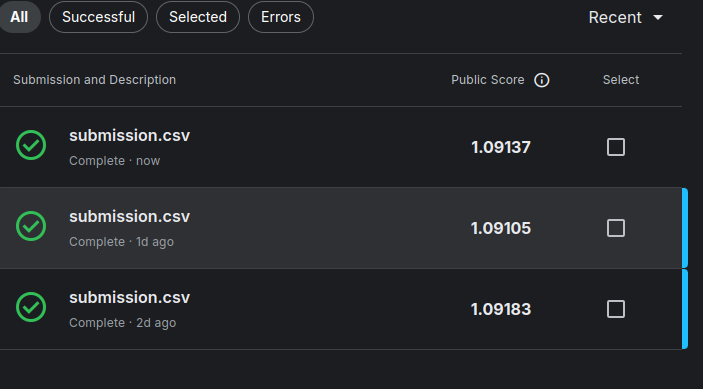

In [76]:
%whos


Variable                      Type                  Data/Info
-------------------------------------------------------------
ElasticNet                    ABCMeta               <class 'sklearn.linear_mo<...>nate_descent.ElasticNet'>
GridSearchCV                  ABCMeta               <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
IQR                           float64               2.0
LabelEncoder                  type                  <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
Lasso                         ABCMeta               <class 'sklearn.linear_mo<...>oordinate_descent.Lasso'>
LinearRegression              ABCMeta               <class 'sklearn.linear_mo<...>._base.LinearRegression'>
MinMaxScaler                  type                  <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
PolynomialFeatures            type                  <class 'sklearn.preproces<...>mial.PolynomialFeatures'>
Q1                            float64               0.0
Q3      

In [77]:
cleaning_resource("y2")
cleaning_resource("year_mapping")
cleaning_resource("y_train")


Объём переменной: 457.37 МБ
✅ Объект y2 удалён
Объём переменной: 0.00 МБ
✅ Объект year_mapping удалён
Объём переменной: 24.81 МБ
✅ Объект y_train удалён


In [79]:
cleaning_resource("X_test_poly")

Объём переменной: 3102.12 МБ
✅ Объект X_test_poly удалён


In [80]:
cleaning_resource("X_train_poly")
cleaning_resource("X")


Объём переменной: 12408.44 МБ
✅ Объект X_train_poly удалён
Объём переменной: 434.11 МБ
✅ Объект X удалён


In [126]:
cleaning_resource("train_data_processed")

Объём переменной: 1610.28 МБ
✅ Объект train_data_processed удалён
